<a href="https://colab.research.google.com/github/c-susan/datasci_3_eda/blob/main/hha507assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading and Cleaning Dataset

In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/c-susan/datasci_3_eda/main/datasets/medicare_telehealth_trends_q12023.csv')

In [194]:
# Checking for number of rows and columns
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 19264
Columns: 13


In [195]:
# Preview of data
df.sample(10)

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
7793,2021,2,National,All,All,All,All,0-64,All,2756018.0,3776832.0,934889.0,0.3392
9920,2021,4,Illinois,All,Black/African American,All,All,All,All,87822.0,117942.0,16729.0,0.1905
13584,2022,2,Kansas,All,All,All,All,85 and over,All,39166.0,45731.0,2608.0,0.0666
12940,2022,1,Oklahoma,All,Asian/Pacific Islander,All,All,All,All,2674.0,4220.0,326.0,0.1219
17323,2022,Overall,Michigan,All,All,All,All,All,All,817132.0,828516.0,258198.0,0.3160
4635,2020,4,Tennessee,All,All,All,ESRD,All,All,7860.0,8234.0,1593.0,0.2027
6550,2021,1,Missouri,All,All,All,All,85 and over,All,58929.0,74028.0,8763.0,0.1487
1752,2020,2,Montana,All,All,All,All,0-64,All,12086.0,18683.0,5339.0,0.4418
8788,2021,3,Kentucky,All,All,All,All,75-84,All,100774.0,120628.0,10851.0,0.1077
11483,2021,Overall,National,All,Other/Unknown,All,All,0-64,All,NaN,NaN,NaN,NaN


In [196]:
# Cleaning column names
columnNames = list(df)
df.columns = [name.strip().lower() for name in columnNames]
df

,year,quarter,bene_geo_desc,bene_mdcd_mdcr_enrl_stus,bene_race_desc,bene_sex_desc,bene_mdcr_entlmt_stus,bene_age_desc,bene_ruca_desc,total_bene_th_elig,total_partb_enrl,total_bene_telehealth,pct_telehealth
0,2020,1,Alabama,All,All,All,Aged,All,All,321952.0,410710.0,16321.0,0.0507
1,2020,1,Alabama,All,All,All,All,0-64,All,68081.0,93955.0,5254.0,0.0772
2,2020,1,Alabama,All,All,All,All,65-74,All,163291.0,217543.0,8652.0,0.0530
3,2020,1,Alabama,All,All,All,All,75-84,All,113008.0,136957.0,5712.0,0.0505
4,2020,1,Alabama,All,All,All,All,85 and over,All,49169.0,59755.0,2178.0,0.0443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19259,2023,1,Wyoming,All,Hispanic,All,All,All,All,2476.0,3786.0,213.0,0.0860
19260,2023,1,Wyoming,All,Non-Hispanic White,All,All,All,All,59795.0,89194.0,4813.0,0.0805
19261,2023,1,Wyoming,All,Other/Unknown,All,All,All,All,NaN,NaN,NaN,NaN
19262,2023,1,Wyoming,Medicare & Medicaid,All,All,All,All,All,7781.0,10302.0,1373.0,0.1765


In [197]:
# Look for missingness in data
df.isnull().sum()

year                           0
quarter                        0
bene_geo_desc                  0
bene_mdcd_mdcr_enrl_stus       0
bene_race_desc                 0
bene_sex_desc                  0
bene_mdcr_entlmt_stus          0
bene_age_desc                  0
bene_ruca_desc                 0
total_bene_th_elig          2040
total_partb_enrl            2040
total_bene_telehealth       2058
pct_telehealth              2061
dtype: int64

In [198]:
df.dtypes

year                          int64
quarter                      object
bene_geo_desc                object
bene_mdcd_mdcr_enrl_stus     object
bene_race_desc               object
bene_sex_desc                object
bene_mdcr_entlmt_stus        object
bene_age_desc                object
bene_ruca_desc               object
total_bene_th_elig          float64
total_partb_enrl            float64
total_bene_telehealth       float64
pct_telehealth              float64
dtype: object

In [199]:
# Converting the 'year' column to a string variable instead of an integer.
df['year'] = df['year'].astype(str)
df.dtypes

year                         object
quarter                      object
bene_geo_desc                object
bene_mdcd_mdcr_enrl_stus     object
bene_race_desc               object
bene_sex_desc                object
bene_mdcr_entlmt_stus        object
bene_age_desc                object
bene_ruca_desc               object
total_bene_th_elig          float64
total_partb_enrl            float64
total_bene_telehealth       float64
pct_telehealth              float64
dtype: object

**____________________________________________________________________________________________________________**

# **1. Univariate Analysis**

>Performing a univariate analysis of each numerical variable



In [200]:
# Summary of statistical measures
df.describe()

,total_bene_th_elig,total_partb_enrl,total_bene_telehealth,pct_telehealth
count,1.722400e+04,1.722400e+04,1.720600e+04,17203.000000
mean,5.152660e+05,6.501606e+05,1.250889e+05,0.244604
std,2.107823e+06,2.635736e+06,5.707911e+05,0.143762
min,1.100000e+01,1.700000e+01,0.000000e+00,0.000000
25%,1.831050e+04,2.393050e+04,3.783250e+03,0.132600
50%,8.157700e+04,1.050960e+05,1.581000e+04,0.211700
75%,2.666505e+05,3.438480e+05,5.468900e+04,0.331850
max,3.094687e+07,3.234595e+07,1.482693e+07,0.820200


### total_bene_th_elig
"Total Telehealth Eligible Users"

This column represents the number of Medicare beneficiaries who received telehealth eligible services (either via Telehealth or non-telehealth).

In [201]:
# Measures of central tendency
mean_elig = df['total_bene_th_elig'].mean()
median_elig = df['total_bene_th_elig'].median()
mode_elig = df['total_bene_th_elig'].mode().iloc[0]
print(f'Mean: {mean_elig} \n Median: {median_elig} \n Mode: {mode_elig}')

Mean: 515266.04638875986 
 Median: 81577.0 
 Mode: 339.0


In [202]:
# Measures of spread
range_elig = df['total_bene_th_elig'].max() - df['total_bene_th_elig'].min()
variance_elig = df['total_bene_th_elig'].var()
std_elig = df['total_bene_th_elig'].std()
percentile25_elig = df['total_bene_th_elig'].quantile(0.25)
percentile50_elig = df['total_bene_th_elig'].quantile(0.5)
percentile75_elig = df['total_bene_th_elig'].quantile(0.75)
iqr_elig = percentile75_elig - percentile25_elig
print(f'Range: {range_elig} \n Variance: {variance_elig} \n Standard Deviation: {std_elig}')
print(f'25th Percentile: {percentile25_elig} \n 50th Percentile (Median): {percentile50_elig} \n 75th Percentile {percentile75_elig} \n Interquartile Range: {iqr_elig}')

Range: 30946863.0 
 Variance: 4442918756419.851 
 Standard Deviation: 2107823.2270330098
25th Percentile: 18310.5 
 50th Percentile (Median): 81577.0 
 75th Percentile 266650.5 
 Interquartile Range: 248340.0


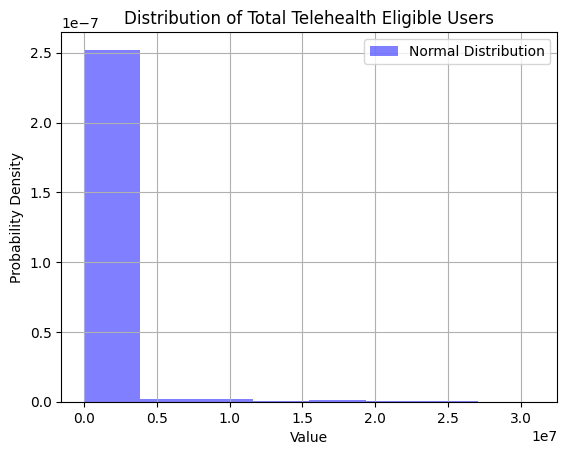

In [213]:
# Visualization
plt.hist(df['total_bene_th_elig'], bins=8, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Telehealth Eligible Users')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### total_partb_enrl
"Total Medicare Part B Enrollment"

Represents the total Medicare population with Part B Fee-for-Service (FFS) Insurance.

In [204]:
# Measures of central tendency
mean_partb = df['total_partb_enrl'].mean()
median_partb = df['total_partb_enrl'].median()
mode_partb = df['total_partb_enrl'].mode().iloc[0]
print(f'Mean: {mean_partb} \n Median: {median_partb} \n Mode: {mode_partb}')

Mean: 650160.6333604273 
 Median: 105096.0 
 Mode: 436.0


In [205]:
# Measures of spread
range_partb = df['total_partb_enrl'].max() - df['total_partb_enrl'].min()
variance_partb = df['total_partb_enrl'].var()
std_partb = df['total_partb_enrl'].std()
percentile25_partb = df['total_partb_enrl'].quantile(0.25)
percentile50_partb = df['total_partb_enrl'].quantile(0.5)
percentile75_partb = df['total_partb_enrl'].quantile(0.75)
iqr_partb = percentile75_partb - percentile25_partb
print(f'Range: {range_partb} \n Variance: {variance_partb} \n Standard Deviation: {std_partb}')
print(f'25th Percentile: {percentile25_partb} \n 50th Percentile (Median): {percentile50_partb} \n 75th Percentile {percentile75_partb} \n Interquartile Range: {iqr_partb}')

Range: 32345936.0 
 Variance: 6947105630087.491 
 Standard Deviation: 2635736.2595843105
25th Percentile: 23930.5 
 50th Percentile (Median): 105096.0 
 75th Percentile 343848.0 
 Interquartile Range: 319917.5


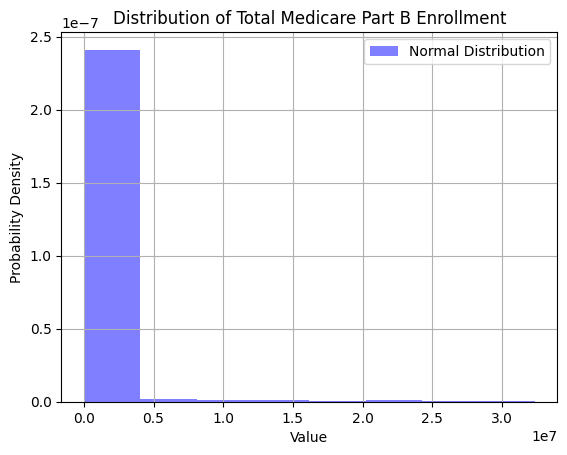

In [214]:
# Visualization
plt.hist(df['total_partb_enrl'], bins=8, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Medicare Part B Enrollment')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### total_bene_telehealth
"Total Telehealth Users"

Represents the total number of Medicare beneficiaries with telehealth visit (includes audio-only telehealth visits).

In [207]:
# Measures of central tendency
mean_telehealth = df['total_bene_telehealth'].mean()
median_telehealth = df['total_bene_telehealth'].median()
mode_telehealth = df['total_bene_telehealth'].mode().iloc[0]
print(f'Mean: {mean_telehealth} \n Median: {median_telehealth} \n Mode: {mode_telehealth}')

Mean: 125088.92031849355 
 Median: 15810.0 
 Mode: 23.0


In [208]:
# Measures of spread
range_telehealth = df['total_bene_telehealth'].max() - df['total_bene_telehealth'].min()
variance_telehealth = df['total_bene_telehealth'].var()
std_telehealth = df['total_bene_telehealth'].std()
percentile25_telehealth = df['total_bene_telehealth'].quantile(0.25)
percentile50_telehealth = df['total_bene_telehealth'].quantile(0.5)
percentile75_telehealth = df['total_bene_telehealth'].quantile(0.75)
iqr_telehealth = percentile75_telehealth - percentile25_telehealth
print(f'Range: {range_telehealth} \n Variance: {variance_telehealth} \n Standard Deviation: {std_telehealth}')
print(f'25th Percentile: {percentile25_telehealth} \n 50th Percentile (Median): {percentile50_telehealth} \n 75th Percentile {percentile75_telehealth} \n Interquartile Range: {iqr_telehealth}')

Range: 14826931.0 
 Variance: 325802495871.20233 
 Standard Deviation: 570791.1140436599
25th Percentile: 3783.25 
 50th Percentile (Median): 15810.0 
 75th Percentile 54689.0 
 Interquartile Range: 50905.75


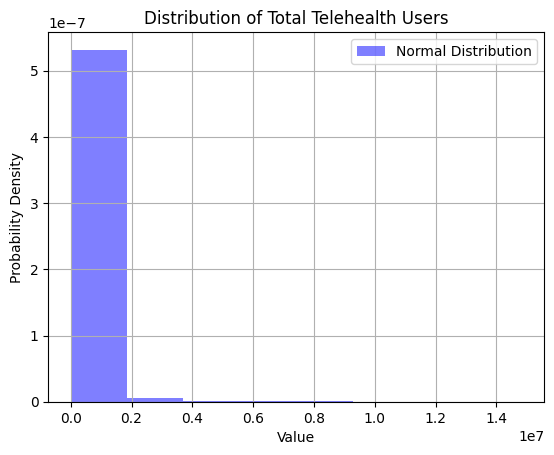

In [215]:
# Visualization
plt.hist(df['total_bene_telehealth'], bins=8, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Telehealth Users')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### pct_telehealth
"Percentage of Medicare Users with a Telehealth Service"

Represents the percent of Medicare users who received at least one telehealth service. Calculated by dividing Total Telehealth Users (total_bene_telehealth) by Total Telehealth Eligible Users (total_bene_th_elig).

In [210]:
# Measures of central tendency
mean_pct = df['pct_telehealth'].mean()
median_pct = df['pct_telehealth'].median()
mode_pct = df['pct_telehealth'].mode().iloc[0]
print(f'Mean: {mean_pct} \n Median: {median_pct} \n Mode: {mode_pct}')

Mean: 0.2446041969423938 
 Median: 0.2117 
 Mode: 0.0668


In [211]:
# Measures of spread
range_pct = df['pct_telehealth'].max() - df['pct_telehealth'].min()
variance_pct = df['pct_telehealth'].var()
std_pct = df['pct_telehealth'].std()
percentile25_pct = df['pct_telehealth'].quantile(0.25)
percentile50_pct = df['pct_telehealth'].quantile(0.5)
percentile75_pct = df['pct_telehealth'].quantile(0.75)
iqr_pct = percentile75_pct - percentile25_pct
print(f'Range: {range_pct} \n Variance: {variance_pct} \n Standard Deviation: {std_pct}')
print(f'25th Percentile: {percentile25_pct} \n 50th Percentile (Median): {percentile50_pct} \n 75th Percentile {percentile75_pct} \n Interquartile Range: {iqr_pct}')

Range: 0.8202 
 Variance: 0.020667650874141425 
 Standard Deviation: 0.143762480759555
25th Percentile: 0.1326 
 50th Percentile (Median): 0.2117 
 75th Percentile 0.33185 
 Interquartile Range: 0.19924999999999998


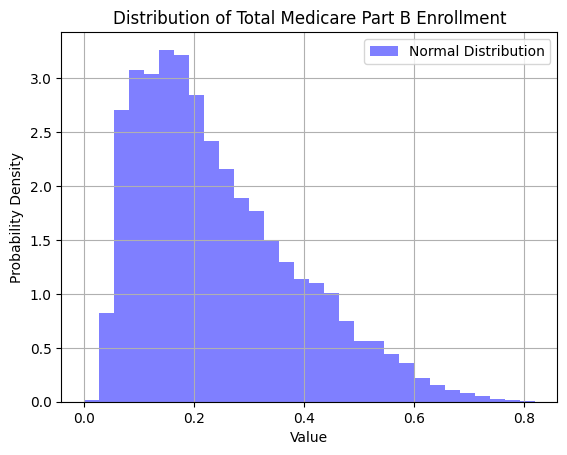

In [212]:
# Visualization
plt.hist(df['pct_telehealth'], bins=30, density=True, alpha=0.5, color='blue', label='Normal Distribution')
plt.title('Distribution of Total Medicare Part B Enrollment')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


**____________________________________________________________________________________________________________**

# **2. Bivariate Analysis**

**____________________________________________________________________________________________________________**

# **3. Handling Outliers**

**____________________________________________________________________________________________________________**

# **4. Automated Analysis**